In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# OSeMOSYS Global Capacity Expansion Results for Nepal

## Read in OSeMOSYS Results

In [40]:
annual_emissions = pd.read_csv('./Model/Results/AnnualEmissions.csv')
capital_investments = pd.read_csv('./Model/Results/CapitalInvestment.csv')
new_capacity = pd.read_csv('./Model/Results/NewCapacity.csv')
demand = pd.read_csv('./Model/Results/Demand.csv')
production_annual = pd.read_csv('./Model/Results/ProductionByTechnologyAnnual.csv')
total_capacity = pd.read_csv('./Model/Results/TotalCapacityAnnual.csv')

## Filter and Aggregate Results

In [41]:
capital_investments = capital_investments.loc[
    (capital_investments['TECHNOLOGY'].str.startswith('PWR')) &
    (capital_investments['TECHNOLOGY'].str[3:6] != "TRN")].reset_index(drop=True)
new_capacity = new_capacity.loc[
    (new_capacity['TECHNOLOGY'].str.startswith('PWR')) & 
    (new_capacity['TECHNOLOGY'].str[3:6] != "TRN")].reset_index(drop=True)
production_annual = production_annual.loc[
    (production_annual['TECHNOLOGY'].str.startswith('PWR')) & 
    (production_annual['TECHNOLOGY'].str[3:6] != "TRN")].reset_index(drop=True)
total_capacity = total_capacity.loc[
    (total_capacity['TECHNOLOGY'].str.startswith('PWR')) &
    (total_capacity['TECHNOLOGY'].str[3:6] != "TRN")].reset_index(drop=True)
demand = demand.groupby(by=['YEAR','FUEL','REGION']).sum().reset_index()

### Clean up dataframes for plotting

In [48]:
name_map = {
    "BIO":"Biomass",
    "COA":"Coal",
    "COG":"Cogeneration",
    "CCG":"CombinedCycleGas",
    "OCG":"OpenCycleGas",
    "GEO":"Geothermal",
    "HYD":"Hydro",
    "URN":"Nuclear",
    "OIL":"Oil",
    "OTH":"Other",
    "PET":"Petroleum",
    "SPV":"Solar",
    "WAS":"Waste",
    "WAV":"Wave",
    "WON":"Wind",
    "CSP":"Concentrated Solar",
    "WOF":"OffshoreWind",
    "ELC":"Electricity"
}

colour_map = {
    "BIO":"darkgreen",
    "CCG":"lightcoral",
    "COA":"black",
    "COG":"peru",
    "CSP":"wheat",
    "ELC":"yellow",
    "GAS":"orange",
    "GEO":"darkseagreen",
    "HYD":"dodgerblue",
    "OCG":"firebrick",
    "OIL":"lightgrey",
    "OTH":"teal",
    "PET":"grey",
    "SOL":"gold",
    "SPV":"gold",
    "URN":"mediumseagreen",
    "WAS":"darkkhaki",
    "WAV":"navy",
    "WOF":"violet",
    "WON":"blueviolet",
}

colour_map_full_name = {tech:colour_map[code] for code,tech in name_map.items()}

In [43]:
capital_investments["CODE"] = capital_investments["TECHNOLOGY"].str[3:6]
capital_investments["TECHNOLOGY"] = capital_investments["CODE"].map(name_map)

new_capacity["CODE"] = new_capacity["TECHNOLOGY"].str[3:6]
new_capacity["TECHNOLOGY"] = new_capacity["CODE"].map(name_map)

production_annual["CODE"] = production_annual["TECHNOLOGY"].str[3:6]
production_annual["TECHNOLOGY"] = production_annual["CODE"].map(name_map)

total_capacity["CODE"] = total_capacity["TECHNOLOGY"].str[3:6]
total_capacity["TECHNOLOGY"] = total_capacity["CODE"].map(name_map)

demand["CODE"] = demand["FUEL"].str[0:3]
demand["FUEL"] = demand["CODE"].map(name_map)

## Plot Results

### Installed Capacity 

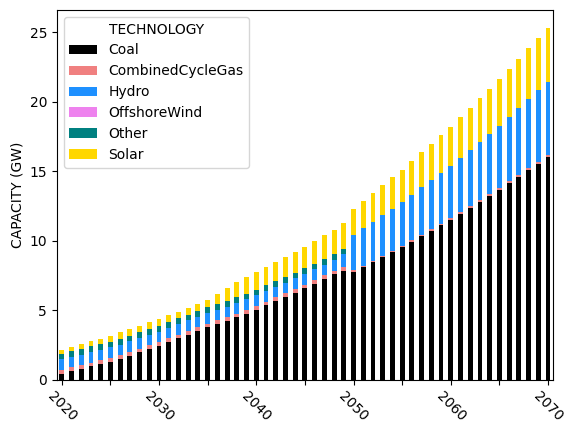

In [53]:
total_capacity_2 = total_capacity.pivot(index='YEAR',columns='TECHNOLOGY',values='VALUE')

ax = total_capacity_2.plot.bar( 
    stacked=True,
    color=colour_map_full_name
)

ax.set_ylabel('CAPACITY (GW)')
ax.set_xlabel('')
plt.locator_params(axis='x', nbins=11)
plt.xticks(rotation = -45)

for label in ax.xaxis.get_ticklabels()[1::2]:
    label.set_visible(False)

### Electricity Generation

In [54]:
def add_legend_line(legend):
    ax = legend.axes

    handles, labels = ax.get_legend_handles_labels()
    handles.append(mlines.Line2D([],[],color='k'))
    labels.append("Demand")
    for h,l in enumerate(labels):
        if l == 'VALUE':
            labels.remove(l)
            del handles[h]

    legend._legend_box = None
    legend._init_legend_box(handles, labels)
    legend._set_loc(legend._loc)
    legend.set_title(legend.get_title().get_text())

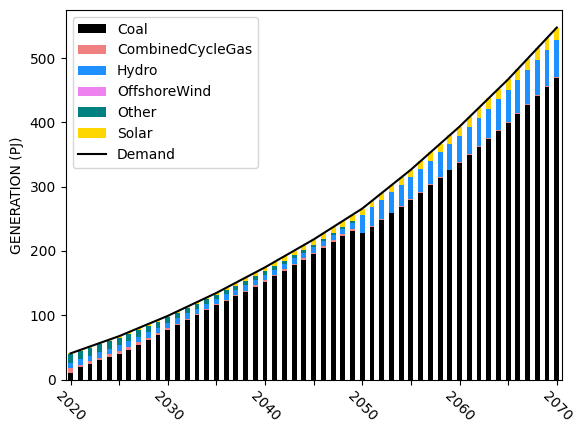

In [55]:
production_annual_2 = production_annual.pivot(index='YEAR',columns='TECHNOLOGY',values='VALUE')

ax = production_annual_2.plot.bar( 
    stacked=True,
    color=colour_map_full_name
)

xticks = ax.get_xticks()

demand['VALUE'].plot(
    x=xticks,
    ax=ax,
    color='k')

ax.set_ylabel('GENERATION (PJ)')
ax.set_xlabel('')
plt.locator_params(axis='x', nbins=11)
plt.xticks(rotation = -45)

for label in ax.xaxis.get_ticklabels()[1::2]:
    label.set_visible(False) 

legend = ax.legend()
add_legend_line(legend)

### Capital Investments 
Note, the spike in capital investments signals the retirment of technologies that are replaced with hydropower 

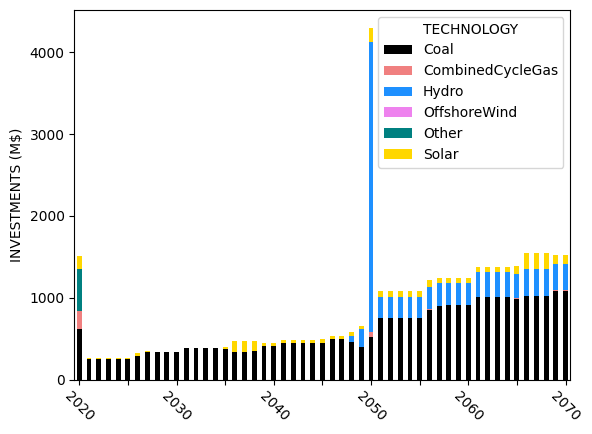

In [56]:
capital_investments_2 = capital_investments.pivot(index='YEAR',columns='TECHNOLOGY',values='VALUE')

ax = capital_investments_2.plot.bar( 
    stacked=True,
    color=colour_map_full_name
)

ax.set_ylabel('INVESTMENTS (M$)')
ax.set_xlabel('')
plt.locator_params(axis='x', nbins=11)
plt.xticks(rotation = -45)

for label in ax.xaxis.get_ticklabels()[1::2]:
    label.set_visible(False) 

### Emissions

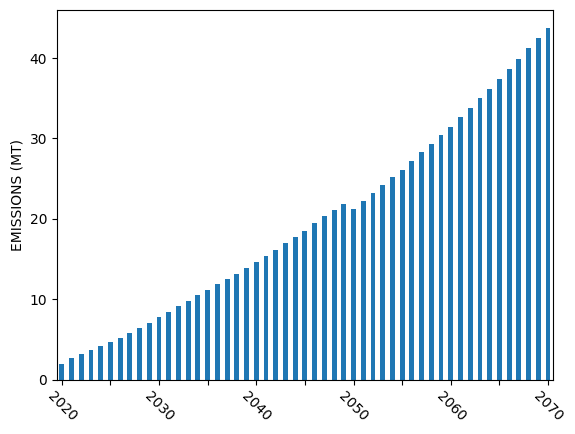

In [57]:
ax = annual_emissions.plot.bar( 
    x='YEAR',
    y='VALUE',
    legend=False
)

ax.set_ylabel('EMISSIONS (MT)')
ax.set_xlabel('')
plt.locator_params(axis='x', nbins=11)
plt.xticks(rotation = -45)

for label in ax.xaxis.get_ticklabels()[1::2]:
    label.set_visible(False) 

# GSA Results

## Read in GSA Results

### Objective cost

### Model period emissions

### Renewable energy generation share in last year

### Append and sort mu* values

## Plot Results 

### mu* Results

### Method of Morris for renewable energy generation share
Our GSA has 39 sensitivity parameters and 10 trajectories, resulting in (39+1)*10 model runs. Each trajectory group is shown below.   